#🔢 Week 4 Assignment: The "AI Eye" for Handwritten Digits
Welcome to your Week 4 Assignment! 🚀

Last week, we saw how Neural Networks can bend to fit complex data. Today, we are going to apply that to Images. We'll start with a "Standard" Neural Network (ANN) and then upgrade it to a Convolutional Neural Network (CNN) to see why CNNs are the undisputed kings of Computer Vision.

## 🛠️ Step 0: Tooling Up
Let's import our libraries.

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

print("✅ Libraries imported!")

✅ Libraries imported!


## 📂 Step 1: Loading the MNIST Dataset

The MNIST dataset consists of 70,000 small images of digits (0-9) handwritten by high school students and employees of the United States Census Bureau.

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training images: (60000, 28, 28)
Testing images: (10000, 28, 28)


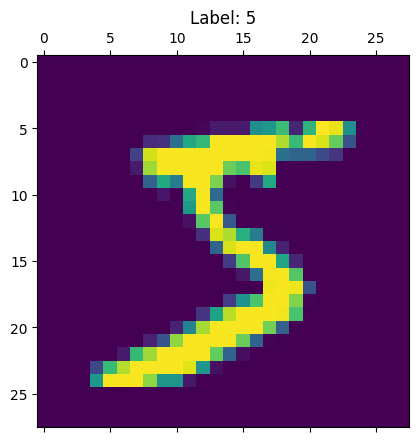

In [3]:
# TODO: Load the data from keras datasets
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

# Check the shapes
print(f"Training images: {X_train.shape}")
print(f"Testing images: {X_test.shape}")

# Let's look at one!
plt.matshow(X_train[0])
plt.title(f"Label: {y_train[0]}")
plt.show()

##🧹 Step 2: Normalization

Remember from last week: AI likes numbers between 0 and 1. Currently, our pixels are 0-255.

###📝 Your Task:

Divide the datasets by 255.

In [5]:
# TODO: Normalize X_train and X_test
X_train = X_train / 255.0
X_test = X_test / 255.0

print("✅ Data Normalized!")

✅ Data Normalized!


##🏗️ Step 3: The Baseline (ANN)

First, let's try a standard Artificial Neural Network. Since ANNs take 1D lists as input, we have to "Flatten" our 28x28 image into a single list of 784 pixels.

###📝 Your Task:

Build a Sequential model with a Flatten layer, one Hidden layer (100 neurons), and one Output layer (10 neurons).

In [6]:
# TODO: Complete the ANN structure
ann_model = keras.Sequential([
    # Flatten the 28x28 image into a 1D vector
    keras.layers.Flatten(input_shape=(28, 28)),

    # Hidden layer with 100 neurons
    keras.layers.Dense(100, activation='relu'),

    # Output layer with 10 neurons (one for each digit 0-9)
    keras.layers.Dense(10, activation='softmax') # Using softmax for multi-class classification
])

### Compile the model using adam optimizer,sparse_categorical_crossentropy, and use accuracy matrix
ann_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Train for 5 epochs and evaluate
print("Training ANN...")
ann_model.fit(X_train, y_train, epochs=5)

print("\nANN Test Evaluation:")
ann_model.evaluate(X_test, y_test)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training ANN...
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8671 - loss: 0.4625
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9619 - loss: 0.1329
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9744 - loss: 0.0895
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9808 - loss: 0.0638
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9843 - loss: 0.0520

ANN Test Evaluation:
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9703 - loss: 0.0925


[0.08161071687936783, 0.9739999771118164]

##👁️ Step 4: The Upgrade (CNN)

ANNs are okay, but they "forget" the shape of the digit because they flatten it. A CNN looks at the image in 2D, searching for edges and curves.

**Important**: For a CNN, we need to tell it that there is 1 color channel (Grayscale). We need to reshape our data to (28, 28, 1).

In [ ]:
# Reshaping for the CNN
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

print(f"New Shape: {X_train.shape}")

###📝 Your Task:

Build the CNN. Use a Conv2D layer to find features and a MaxPooling2D layer to summarize them.

In [7]:
# TODO: Complete the CNN structure
cnn_model = keras.Sequential([
    # 1. Convolutional Layer (The Filter)
    # Hint: Use 30 filters, kernel size (3,3)
    layers.Conv2D(filters=30, kernel_size=(3,3), activation='relu', input_shape=(28, 28, 1)),

    # 2. Pooling Layer (The Zoom Out)
    layers.MaxPooling2D((2,2)),

    # 3. Dense Layers (The Decision)
    layers.Flatten(),
    layers.Dense(100, activation='relu'),
    layers.Dense(10, activation='softmax')
])

cnn_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train for 5 epochs
print("Training CNN...")
cnn_model.fit(X_train, y_train, epochs=5)

# Evaluate
print("\nCNN Test Evaluation:")
cnn_model.evaluate(X_test, y_test)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training CNN...
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 19ms/step - accuracy: 0.9054 - loss: 0.3145
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 19ms/step - accuracy: 0.9831 - loss: 0.0549
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 19ms/step - accuracy: 0.9895 - loss: 0.0340
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.9932 - loss: 0.0219
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 19ms/step - accuracy: 0.9956 - loss: 0.0154

CNN Test Evaluation:
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9833 - loss: 0.0489


[0.04103080555796623, 0.9871000051498413]

## 📊 Step 5: Final Analysis

Check your results!

**Submission**: Save this notebook and submit your Google Colab link via the Assignment 4 Form!

*Created with ❤️ for WiDS Project*